### Stephen Saidim
### 19/03644
### Assignment Two: Data Exploratory analysis


1. Download numeric data from any available online sources such as www.Kaggle.com and Kenya government open data website (https://kenya.opendataforafrica.org/). 

2. Use python libraries to examine the following characteristics of the downloaded data	4 marks) 


    a). The center of distribution

   
     b) Shape of distribution

   
     c) Spread of Distribution

   
     d) Relationships between any two variables

   
  
4.  Apply python libraries to visualize the results of each analysis in Task 2 			(4 marks) 

5.  Use markdown cells on the Jupyter notebook to explain the results for each analysis in Task 2 (2 Marks) 

### 1. importing the libraries files

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the data set into jupyter

In [66]:
data = pd.read_csv("/home/compess/Desktop/Principle of Data science/csv files/Sales_without_NaNs_v1.3.csv")
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         10000 non-null  object 
 1   Customer_Segment              10000 non-null  object 
 2   Sales_Before                  10000 non-null  float64
 3   Sales_After                   10000 non-null  float64
 4   Customer_Satisfaction_Before  10000 non-null  float64
 5   Customer_Satisfaction_After   10000 non-null  float64
 6   Purchase_Made                 10000 non-null  object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,74.093658,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,Control,High Value,229.685623,270.167701,83.974852,87.738591,Yes


# a). The center of distribution
### 3. Examining the center of distribution for the dataset above
This include: Mean, mode and median

#### Mean

In [69]:
#Finding mean of cloumns that only have numerical values
mean= data.mean(numeric_only=True)

print("Mean for each column is")
print(mean)

Mean for each column is
Sales_Before                    203.846220
Sales_After                     280.378330
Customer_Satisfaction_Before     70.249026
Customer_Satisfaction_After      73.921449
dtype: float64


 Mean (Average):

Sales_Before: 203.85

Sales_After: 280.38

This indicates that the average sales increased significantly after the intervention, suggesting that whatever action was taken had a positive impact on sales.

### Median

In [72]:
#Findin the median of each column
#The median represents the middle value of a dataset when the values are arranged in ascending order.
median = data.median(numeric_only=True)
print("The median for each column is:")
print (median)

The median for each column is:
Sales_Before                    203.347924
Sales_After                     273.599150
Customer_Satisfaction_Before     69.644307
Customer_Satisfaction_After      73.708858
dtype: float64


Median (Middle Value):

Sales_Before: 203.35

Sales_After: 273.60

This suggests that the central point of sales has shifted upwards, meaning a general improvement in sales across most customers.


### Mode

In [75]:
# Findind the mode of each colum
#Mode is the value that appear most in a dataset
mode=data.mode(numeric_only=True).iloc[0]
print("The mode for each column is \n") 

display(mode)

The mode for each column is 



Sales_Before                    203.846220
Sales_After                     243.766889
Customer_Satisfaction_Before    100.000000
Customer_Satisfaction_After     100.000000
Name: 0, dtype: float64

Mode (Most Frequent Value):

Sales_Before: 203.85

Sales_After: 243.77

The most common sales value increased after intervention but is still lower than the mean. This could suggest that while many customers’ purchases increased, a few high-value transactions might be raising the mean.

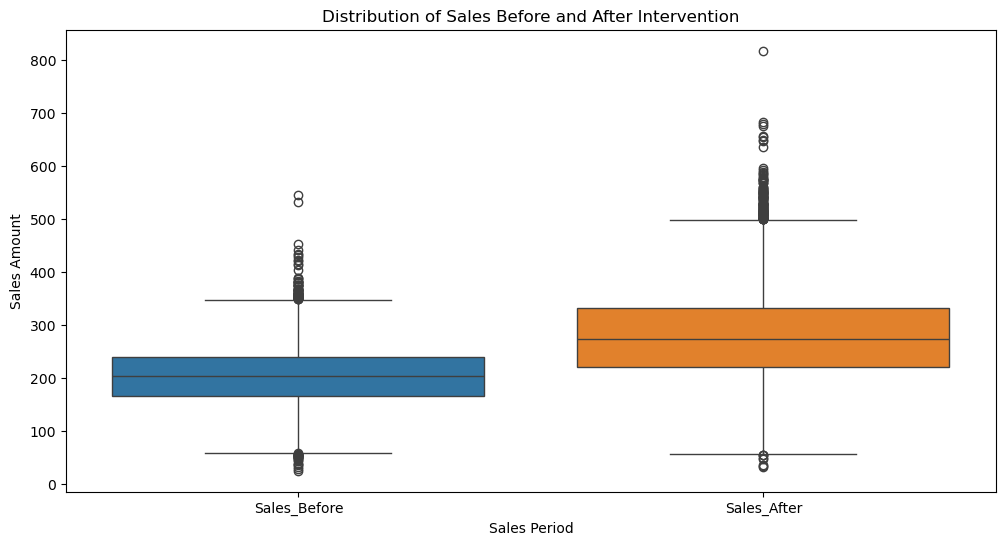

In [77]:
# Descriptive statistics for Sales Before and Sales After
#sales_stats = data[['Sales_Before', 'Sales_After']].describe()
#print("\nDescriptive Statistics for Sales Before and Sales After:\n", sales_stats)

# Visualizing Sales Before and Sales After using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Sales_Before', 'Sales_After']])
plt.title('Distribution of Sales Before and After Intervention')
plt.ylabel('Sales Amount')
plt.xlabel('Sales Period')
plt.show()



# b. Shape of Distribution:
###  Skewness and Kurtosis


In [79]:
# Skewness measures the asymmetry of the data (0 means symmetric, >0 right-skewed, <0 left-skewed)
# Kurtosis measures the "tailedness" of the distribution (3 is normal, >3 heavy-tailed, <3 light-tailed)

skewness = data[['Sales_Before', 'Sales_After']].skew()
kurtosis = data[['Sales_Before', 'Sales_After']].kurtosis()

print("\nSkewness of Sales Before and After:\n", skewness)
print("\nKurtosis of Sales Before and After:\n", kurtosis)


Skewness of Sales Before and After:
 Sales_Before    0.211932
Sales_After     0.445738
dtype: float64

Kurtosis of Sales Before and After:
 Sales_Before    0.401947
Sales_After     0.523358
dtype: float64


#### Skewness
Sales_Before: 0.212

This value is slightly positive, suggesting that the distribution of Sales_Before is nearly symmetric with a minor tendency toward right skew (a slightly longer tail on the right side).

Sales_After: 0.446

Similarly, this value is positive, but a bit higher than Sales_Before. This indicates that Sales_After is also slightly right-skewed, meaning that there are a few higher sales values pulling the mean to the right of the median.

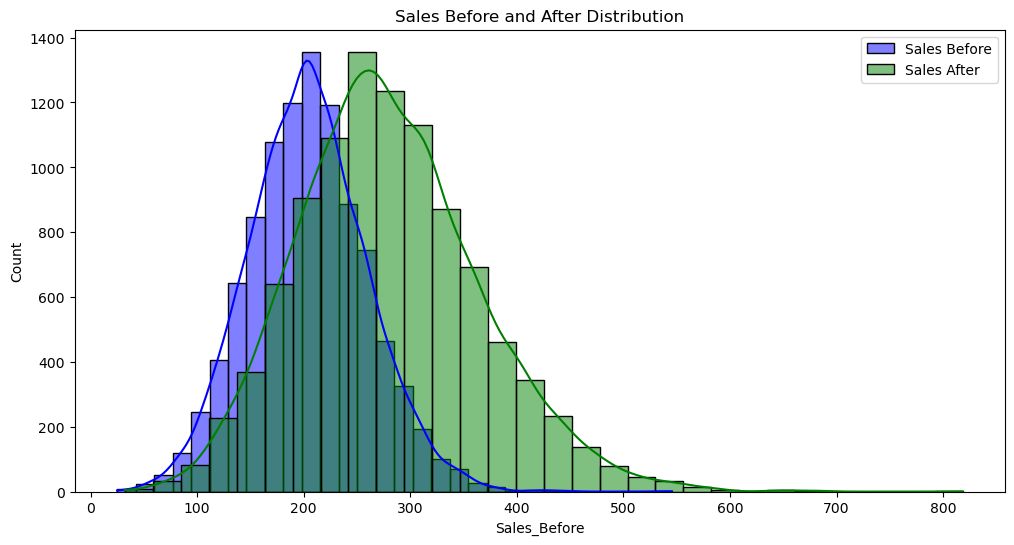

In [81]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Sales_Before'], kde=True, color='blue', label='Sales Before', bins=30)
sns.histplot(data['Sales_After'], kde=True, color='green', label='Sales After', bins=30)
plt.title('Sales Before and After Distribution')
plt.legend()
plt.show()



Both Sales_Before and Sales_After exhibit slight right skewness, meaning that while most of the data points are clustered around a central value, there are some relatively higher sales figures influencing the distribution.

The low kurtosis values ( suggest that the data do not have heavy tails. This implies that there are fewer extreme values or outliers compared to what you might see in a normal distribution.

### c. Spread of distribution (variance, standard deviation, IQR)


In [84]:
# Calculate Variance
variance = data[['Sales_Before', 'Sales_After']].var()
print("Variance of Sales Before and After:\n", variance)

# Calculate Standard Deviation
std_dev = data[['Sales_Before', 'Sales_After']].std()
print("\nStandard Deviation of Sales Before and After:\n", std_dev)


Variance of Sales Before and After:
 Sales_Before    3072.619552
Sales_After     7304.083823
dtype: float64

Standard Deviation of Sales Before and After:
 Sales_Before    55.431215
Sales_After     85.463933
dtype: float64


In [85]:
# Calculate IQR for each column
Q1 = data[['Sales_Before', 'Sales_After']].quantile(0.25)
Q3 = data[['Sales_Before', 'Sales_After']].quantile(0.75)
IQR = Q3 - Q1
print("\nInterquartile Range (IQR) of Sales Before and After:\n", IQR)



Interquartile Range (IQR) of Sales Before and After:
 Sales_Before     72.609361
Sales_After     110.938366
dtype: float64


Interpretation:

The higher variance and standard deviation for Sales_After suggest that sales figures after the intervention are more spread out and variable than those before. This means there's more inconsistency or diversity in the sales numbers in the later period.

The IQR, which captures the middle 50% of your data, is larger for Sales_After. This reinforces that the central bulk of your post-intervention sales data is more spread out compared to Sales_Before.

### d. Relationships between variables (correlation matrix, scatter plots)


In [87]:
# Correlation matrix for all numeric columns
correlation_matrix = data.corr(numeric_only=True)

print("\nCorrelation Matrix:\n", correlation_matrix)





Correlation Matrix:
                               Sales_Before  Sales_After  \
Sales_Before                      1.000000     0.892221   
Sales_After                       0.892221     1.000000   
Customer_Satisfaction_Before      0.261455     0.223597   
Customer_Satisfaction_After       0.238579     0.205738   

                              Customer_Satisfaction_Before  \
Sales_Before                                      0.261455   
Sales_After                                       0.223597   
Customer_Satisfaction_Before                      1.000000   
Customer_Satisfaction_After                       0.840205   

                              Customer_Satisfaction_After  
Sales_Before                                     0.238579  
Sales_After                                      0.205738  
Customer_Satisfaction_Before                     0.840205  
Customer_Satisfaction_After                      1.000000  


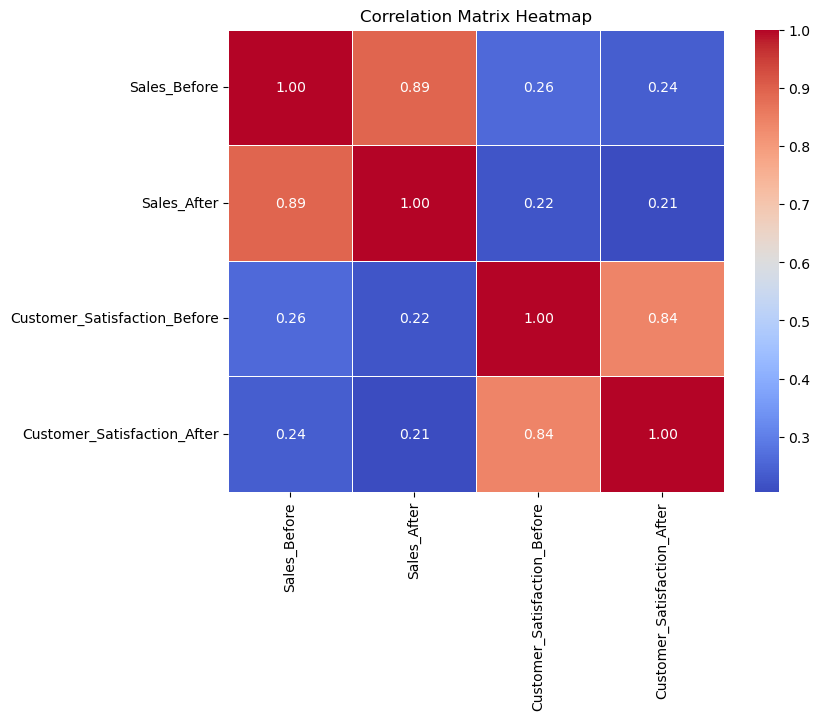

In [88]:
# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

1. Sales Relationships

Sales_Before & Sales_After (0.89): Strong positive correlation—higher sales before are linked to higher sales after.

2. Sales and Customer Satisfaction

Weak positive correlations (0.21–0.26): Sales and customer satisfaction are only slightly related—changes in one do not strongly affect the other.

3. Customer Satisfaction Consistency

Customer_Satisfaction_Before & After (0.84): Strong positive correlation—customers who were satisfied before are likely to stay satisfied after.
